In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
application_data=pd.read_csv("application_data.csv")

In [20]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
previous_application=pd.read_csv("previous_application.csv")

In [22]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
previous_application.shape

(1670214, 37)

In [25]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [26]:
previous_application.shape

(1670214, 37)

In [28]:
#FINDING THE MISSING VALUE PERCENTAGE FOR EACH COLUMN
(previous_application.isnull().sum()/len(previous_application.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
#There are large number of missing values

#Columns having more than 50% missing values can be dropped as they cannot help in the analysis.
#For columns having less than 50% missing values,values can be imputed.

previous_application=previous_application.drop(["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED"],axis=1)

In [42]:
#Checking the percentages:

In [40]:
(previous_application.isnull().sum()/len(previous_application.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [41]:
#Treating the missing values based on each columns

In [54]:
#Column :AMT_ANNUITY(Annuity of previous application)

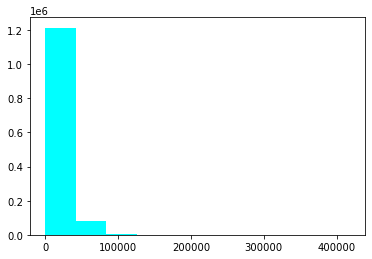

In [44]:
plt.hist(previous_application["AMT_ANNUITY"],color="cyan")
plt.show()

In [45]:
#Finding the median

previous_application["AMT_ANNUITY"].median()

11250.0

In [47]:
#Filling the NA with median

previous_application["AMT_ANNUITY"]=previous_application["AMT_ANNUITY"].fillna(previous_application["AMT_ANNUITY"].median())

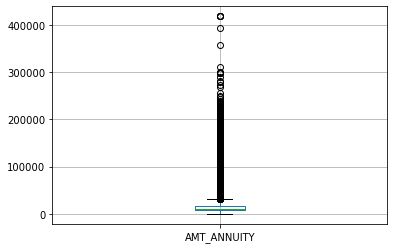

In [48]:
#viewing the boxplot

previous_application.boxplot(["AMT_ANNUITY"])
plt.show()

In [49]:
#No need to treat outliers as the data are mostly continuous

In [51]:
#Verifying the annuity column after imputation

previous_application["AMT_ANNUITY"].isnull().sum()

0

In [55]:
#Column :AMT_GOODS_PRICE(Goods price of good that client asked for (if applicable) on the previous application)

In [58]:
#FINDING THE NULL VALUES

previous_application["AMT_GOODS_PRICE"].isnull().sum()

385515

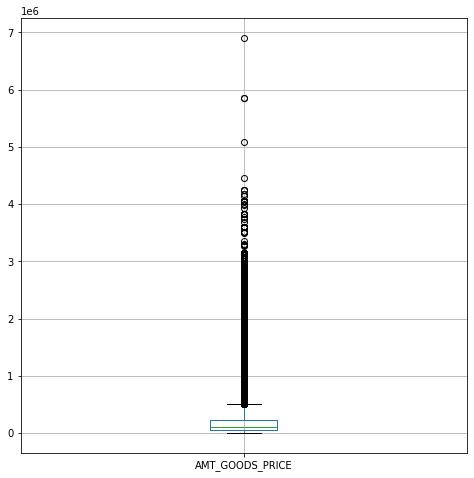

In [66]:
previous_application.boxplot(["AMT_GOODS_PRICE"],figsize=[8,8])
plt.show()

In [85]:
#FILLING THE MISSING VALUES WITH MEDIAN

previous_application["AMT_GOODS_PRICE"].median()

112320.0

In [88]:
previous_application["AMT_GOODS_PRICE"]=previous_application["AMT_GOODS_PRICE"].fillna(previous_application["AMT_GOODS_PRICE"].median())

In [89]:
#VERIFYING THE COLUMN AMT_GOODS_PRICE

previous_application["AMT_GOODS_PRICE"].isnull().sum()

0

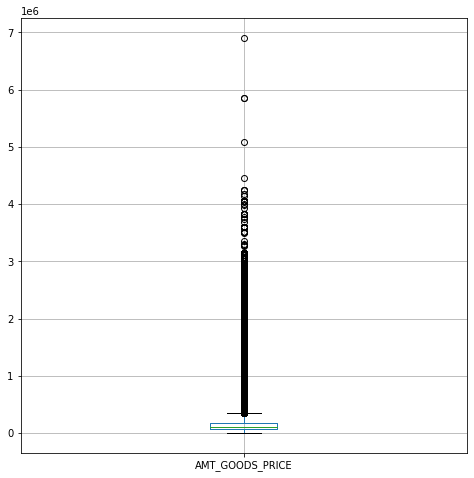

In [90]:
previous_application.boxplot(["AMT_GOODS_PRICE"],figsize=[8,8])
plt.show()

In [91]:
#No need to treat outliers as the data are mostly continuous

In [93]:
#Column: NAME_TYPE_SUITE(Who accompanied client when applying for the previous application)

In [94]:
previous_application["NAME_TYPE_SUITE"].describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [95]:
#There are only 7 unique values;hence it is a categorical column

In [96]:
previous_application["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [98]:
#The missing values should be imputed as "missing"

previous_application["NAME_TYPE_SUITE"]=previous_application["NAME_TYPE_SUITE"].fillna("Missing")

In [99]:
#verifying the column NAME_TYPE_SUITE

previous_application["NAME_TYPE_SUITE"].isnull().sum()

0

In [105]:
#Column CNT_PAYMENT(Term of previous credit at application of the previous application)

In [106]:
previous_application["CNT_PAYMENT"].isnull().sum()

372230

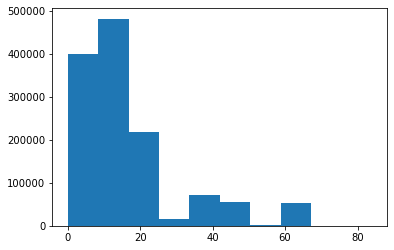

In [107]:
plt.hist(previous_application["CNT_PAYMENT"])
plt.show()

In [112]:
#Imputing the missing values with mean

previous_application["CNT_PAYMENT"]=previous_application["CNT_PAYMENT"].fillna(round(previous_application["CNT_PAYMENT"].mean(),2))

In [113]:
#Verifying the column CNT_PAYMENT

previous_application["CNT_PAYMENT"].isnull().sum()

0

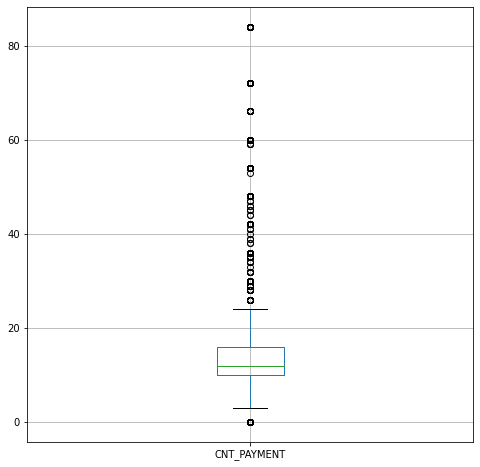

In [115]:
previous_application.boxplot(["CNT_PAYMENT"],figsize=[8,8])
plt.show()

In [116]:
#No need to treat outliers as the data are mostly continuous

In [117]:
#Column DAYS_FIRST_DRAWING(Relative to application date of current application when was the first disbursement of the previous application)

In [119]:
previous_application["DAYS_FIRST_DRAWING"].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [120]:
previous_application["DAYS_FIRST_DRAWING"].isnull().sum()

673065

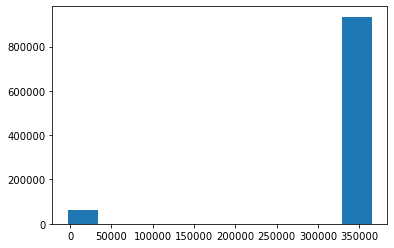

In [121]:
plt.hist(previous_application["DAYS_FIRST_DRAWING"])
plt.show()

In [129]:
#Imputing missing values with median

previous_application["DAYS_FIRST_DRAWING"]=previous_application["DAYS_FIRST_DRAWING"].fillna(previous_application["DAYS_FIRST_DRAWING"].median())

In [145]:
#Verification

previous_application["DAYS_FIRST_DRAWING"].isnull().sum()

0

In [131]:
#Column DAYS_FIRST_DUE(Relative to application date of current application when was the first due supposed to be of the previous application)

In [132]:
previous_application["DAYS_FIRST_DUE"].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [133]:
previous_application["DAYS_FIRST_DUE"].isnull().sum()

673065

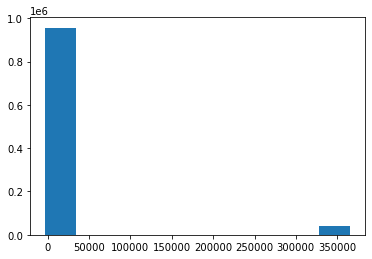

In [134]:
plt.hist(previous_application["DAYS_FIRST_DUE"])
plt.show()

In [146]:
#Filling the missing values with median

previous_application["DAYS_FIRST_DUE"]=previous_application["DAYS_FIRST_DUE"].fillna(previous_application["DAYS_FIRST_DUE"].median())

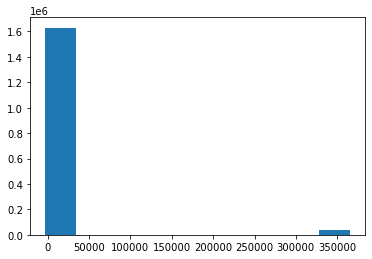

In [148]:
plt.hist(previous_application["DAYS_FIRST_DUE"])
plt.show()

In [150]:
#Verification

previous_application["DAYS_FIRST_DUE"].isnull().sum()

0

In [151]:
#Column DAYS_LAST_DUE_1ST_VERSION(Relative to application date of current application when was the first due of the previous application)

In [152]:
previous_application["DAYS_LAST_DUE_1ST_VERSION"].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [154]:
previous_application["DAYS_LAST_DUE_1ST_VERSION"].isnull().sum()

673065

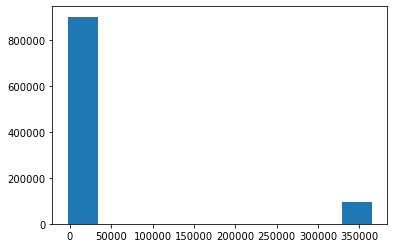

In [155]:
plt.hist(previous_application["DAYS_LAST_DUE_1ST_VERSION"])
plt.show()

In [156]:
#Filling the missing values with the median

previous_application["DAYS_LAST_DUE_1ST_VERSION"].median()

-361.0

In [158]:
previous_application["DAYS_LAST_DUE_1ST_VERSION"]=previous_application["DAYS_LAST_DUE_1ST_VERSION"].fillna(previous_application["DAYS_LAST_DUE_1ST_VERSION"].median())

In [159]:
#Verification

previous_application["DAYS_LAST_DUE_1ST_VERSION"].isnull().sum()

0

In [160]:
#Column DAYS_LAST_DUE(Relative to application date of current application when was the last due date of the previous application)

In [161]:
previous_application["DAYS_LAST_DUE"].isnull().sum()

673065

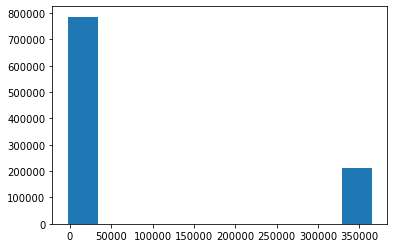

In [163]:
plt.hist(previous_application["DAYS_LAST_DUE"])
plt.show()

In [164]:
#Filling the missing values with median

previous_application["DAYS_LAST_DUE"].median()

-537.0

In [166]:
previous_application["DAYS_LAST_DUE"]=previous_application["DAYS_LAST_DUE"].fillna(previous_application["DAYS_LAST_DUE"].median())

In [168]:
#Verification

previous_application["DAYS_LAST_DUE"].isnull().sum()

0

In [169]:
#column DAYS_TERMINATION(Relative to application date of current application when was the expected termination of the previous application)

In [170]:
previous_application["DAYS_TERMINATION"].isnull().sum()

673065

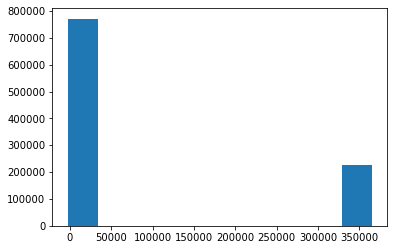

In [171]:
plt.hist(previous_application["DAYS_TERMINATION"])
plt.show()

In [173]:
#Filling the missing values with the median

previous_application["DAYS_TERMINATION"].median()

-499.0

In [175]:
previous_application["DAYS_TERMINATION"]=previous_application["DAYS_TERMINATION"].fillna(previous_application["DAYS_TERMINATION"].median())

In [176]:
#Verification

previous_application["DAYS_TERMINATION"].isnull().sum()

0

In [177]:
#column NFLAG_INSURED_ON_APPROVAL(Did the client requested insurance during the previous application)

In [178]:
previous_application["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()

673065

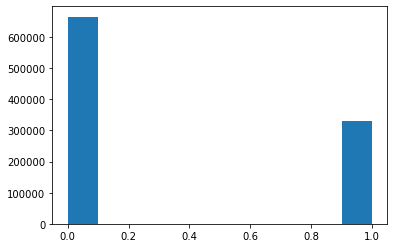

In [181]:
plt.hist(previous_application["NFLAG_INSURED_ON_APPROVAL"])
plt.show()

In [182]:
previous_application["NFLAG_INSURED_ON_APPROVAL"].describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [204]:
#Filling the missing values with median

previous_application["NFLAG_INSURED_ON_APPROVAL"].median()

0.0

In [207]:
previous_application["NFLAG_INSURED_ON_APPROVAL"]=previous_application["NFLAG_INSURED_ON_APPROVAL"].fillna(previous_application["NFLAG_INSURED_ON_APPROVAL"].median())

In [208]:
#Verification

previous_application["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()

0

In [209]:
#Further check for missing values:

previous_application.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       1
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_TYPE_SUITE                  0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
DAYS_FIRST_DRAWING               0
DAYS_FIRST_DUE      

In [210]:
#column AMT_CREDIT(Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT)

In [213]:
previous_application["AMT_CREDIT"].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

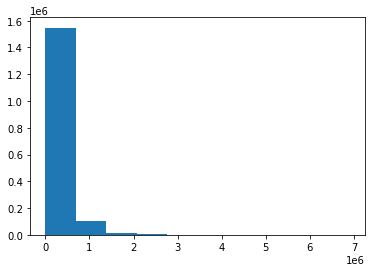

In [214]:
plt.hist(previous_application["AMT_CREDIT"])
plt.show()

In [215]:
#Filling missing values with median

previous_application["AMT_CREDIT"].median()

80541.0

In [217]:
previous_application["AMT_CREDIT"]=previous_application["AMT_CREDIT"].fillna(previous_application["AMT_CREDIT"].median())

In [219]:
#Verification

previous_application["AMT_CREDIT"].isnull().sum()

0

In [220]:
#Column PRODUCT_COMBINATION(Detailed product combination of the previous application)

In [222]:
previous_application["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [223]:
previous_application["PRODUCT_COMBINATION"].mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [226]:
#Filling the missing values with "Cash"

previous_application["PRODUCT_COMBINATION"]=previous_application["PRODUCT_COMBINATION"].fillna("Cash")

In [228]:
#Verfication

previous_application["PRODUCT_COMBINATION"].isnull().sum()

0

In [233]:
#Verifying the data 

previous_application.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [234]:
## HENCE, TREATING OF THE DATA "PREVIOUS APPLICATION" HAS BEEN COMPLETED

In [235]:
# MOVING ON TO APPLICATION DATA

In [238]:
#IMPORTING THE DATASET

application_data=pd.read_csv("application_data.csv")

In [237]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [249]:
#Finding the percentage of missing values

(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [251]:
#Displaying all the columns:
pd.set_option("display.max_rows",None,"display.max_columns",None)
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [252]:
#Columns with more than 50% of missing values should be dropped

In [253]:
#creating a list of columns to delete

deletecolumns=["OWN_CAR_AGE","EXT_SOURCE_1","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]

In [256]:
#Dropping the columns

application_data.drop(deletecolumns,axis=1,inplace=True)

In [258]:
#Verification

pd.set_option("display.max_rows",None,"display.max_columns",None)
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [259]:
application_data.shape

(307511, 81)

In [260]:
# Filling/Imputing the remaining missing values

In [261]:
#Column AMT_ANNUITY(Loan annuity)

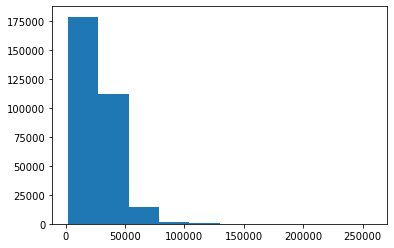

In [262]:
plt.hist(application_data["AMT_ANNUITY"])
plt.show()

In [263]:
#Filling the missing values with median
application_data["AMT_ANNUITY"].median()

24903.0

In [265]:
application_data["AMT_ANNUITY"]=application_data["AMT_ANNUITY"].fillna(application_data["AMT_ANNUITY"].median())

In [267]:
#Verification

application_data["AMT_ANNUITY"].isnull().sum()

0

In [268]:
# Column AMT_GOODS_PRICE(For consumer loans it is the price of the goods for which the loan is given)

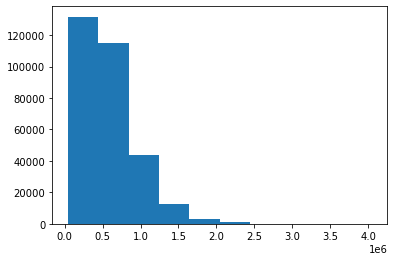

In [270]:
plt.hist(application_data["AMT_GOODS_PRICE"])
plt.show()

In [271]:
#Filling the missing values with median

application_data["AMT_GOODS_PRICE"].median()

450000.0

In [273]:
application_data["AMT_GOODS_PRICE"]=application_data["AMT_GOODS_PRICE"].fillna(application_data["AMT_GOODS_PRICE"].median())

In [274]:
#Verification

application_data["AMT_GOODS_PRICE"].isnull().sum()

0

In [276]:
# Column NAME_TYPE_SUITE(Who was accompanying client when he was applying for the loan)

In [278]:
application_data["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [279]:
# As most of the customers are unaccompanied, filling the missing values with "unaccompanied" could be better

In [281]:
application_data["NAME_TYPE_SUITE"]=application_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [282]:
#Verification

application_data["NAME_TYPE_SUITE"].isnull().sum()

0

In [283]:
# Column OCCUPATION_TYPE(What kind of occupation does the client have)

In [284]:
application_data["OCCUPATION_TYPE"].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [285]:
application_data["OCCUPATION_TYPE"].isnull().sum()

96391

In [286]:
application_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [289]:
#Removing the missing values

application_data["OCCUPATION_TYPE"]=application_data["OCCUPATION_TYPE"][~application_data["OCCUPATION_TYPE"].isnull()]

In [290]:
application_data.dropna(subset=["OCCUPATION_TYPE"],inplace=True)

In [292]:
#Verification

application_data["OCCUPATION_TYPE"].isnull().sum()

0

In [293]:
application_data.shape

(211120, 81)

In [294]:
# Dropping the columns that is not required for the analysis

In [296]:
application_data.drop(["FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_EMP_PHONE","FLAG_PHONE","FLAG_CONT_MOBILE","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE","EXT_SOURCE_2","EXT_SOURCE_3","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","FLOORSMAX_AVG","FLOORSMAX_MODE","FLOORSMAX_MEDI","EMERGENCYSTATE_MODE","TOTALAREA_MODE","YEARS_BEGINEXPLUATATION_AVG","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI"],axis=1,inplace=True)

In [298]:
#Verification

application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

In [299]:
# Treating the column CODE_GENDER

In [301]:
application_data["CODE_GENDER"].value_counts()

F      129282
M       81836
XNA         2
Name: CODE_GENDER, dtype: int64

In [302]:
# Replacing XNA with F

application_data["CODE_GENDER"].replace("XNA","F",inplace=True)

In [303]:
application_data["CODE_GENDER"].value_counts()

F    129284
M     81836
Name: CODE_GENDER, dtype: int64

In [304]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000947
WEEKDAY_APPR_PRO

In [305]:
#Column CNT_FAM_MEMBERS(How many family members does client have)

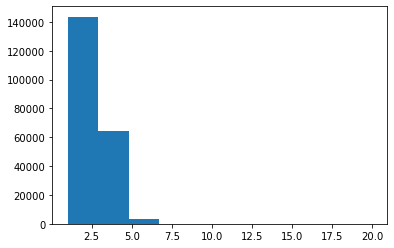

In [306]:
plt.hist(application_data["CNT_FAM_MEMBERS"])
plt.show()

In [307]:
#Imputing with median

application_data["CNT_FAM_MEMBERS"]=application_data["CNT_FAM_MEMBERS"].fillna(application_data["CNT_FAM_MEMBERS"].median())

In [308]:
application_data["CNT_FAM_MEMBERS"].isnull().sum()

0

In [309]:
#Column OBS_30_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings with observable 30 DPD (days past due) default)

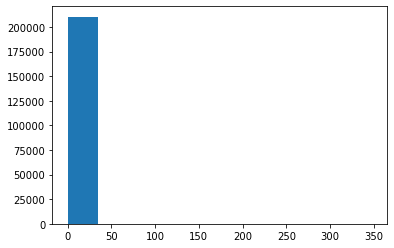

In [310]:
plt.hist(application_data["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.show()

In [311]:
#Filling the missing values with mean

application_data["OBS_30_CNT_SOCIAL_CIRCLE"]=application_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(application_data["OBS_30_CNT_SOCIAL_CIRCLE"].mean())

In [313]:
#Verification

application_data["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

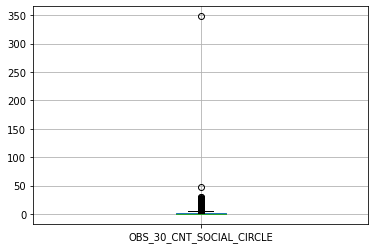

In [315]:
application_data.boxplot("OBS_30_CNT_SOCIAL_CIRCLE")
plt.show()

In [316]:
# One outlier is found in the data

In [317]:
# Column DEF_30_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings defaulted on 30 DPD (days past due))

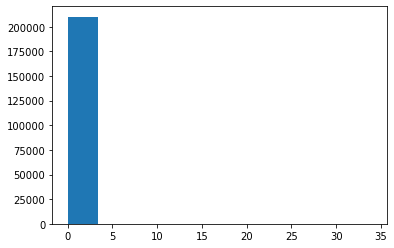

In [318]:
plt.hist(application_data["DEF_30_CNT_SOCIAL_CIRCLE"])
plt.show()

In [319]:
#Filling the missing values with mean

application_data["DEF_30_CNT_SOCIAL_CIRCLE"]=application_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(application_data["DEF_30_CNT_SOCIAL_CIRCLE"].mean())

In [320]:
#Verification

application_data["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

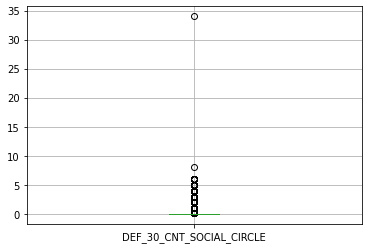

In [321]:
application_data.boxplot("DEF_30_CNT_SOCIAL_CIRCLE")
plt.show()

In [322]:
# One outlier is found in the data

In [323]:
#Column OBS_60_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings with observable 60 DPD (days past due) default)

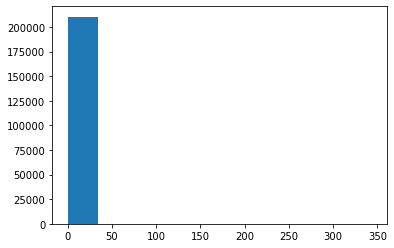

In [324]:
plt.hist(application_data["OBS_60_CNT_SOCIAL_CIRCLE"])
plt.show()

In [325]:
# Filling the missing values with mean

application_data["OBS_60_CNT_SOCIAL_CIRCLE"]=application_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(application_data["OBS_60_CNT_SOCIAL_CIRCLE"].mean())

In [326]:
#Verification

application_data["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

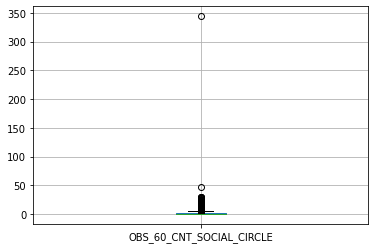

In [327]:
application_data.boxplot("OBS_60_CNT_SOCIAL_CIRCLE")
plt.show()

In [328]:
# One outlier is found in the data

In [329]:
#Column DEF_60_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings defaulted on 60 (days past due) DPD)

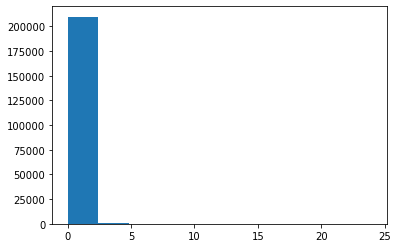

In [331]:
plt.hist(application_data["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.show()

In [332]:
# Filling the missing values with mean

application_data["DEF_60_CNT_SOCIAL_CIRCLE"]=application_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(application_data["DEF_60_CNT_SOCIAL_CIRCLE"].mean())

In [333]:
#Verification

application_data["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

0

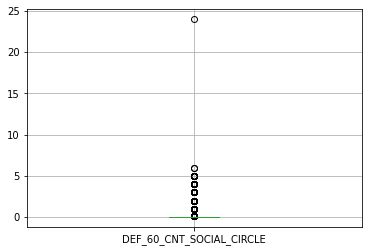

In [334]:
application_data.boxplot("DEF_60_CNT_SOCIAL_CIRCLE")
plt.show()

In [335]:
# One outlier is found in the data

In [336]:
# Column AMT_REQ_CREDIT_BUREAU_HOUR(Number of enquiries to Credit Bureau about the client one hour before application)

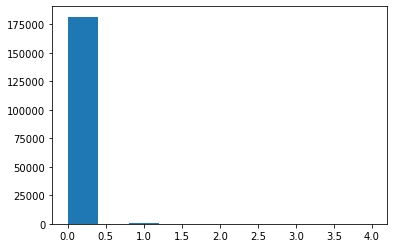

In [337]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_HOUR"])
plt.show()

In [338]:
#Filling the missing value with mean

application_data["AMT_REQ_CREDIT_BUREAU_HOUR"]=application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].mean())

In [339]:
# Verification

application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

0

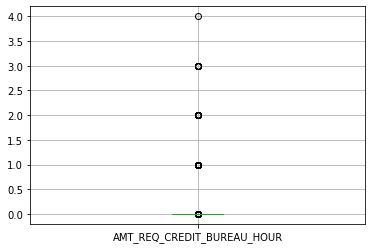

In [340]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_HOUR")
plt.show()

In [341]:
# No outliers found

In [342]:
# Column AMT_REQ_CREDIT_BUREAU_DAY(Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application))

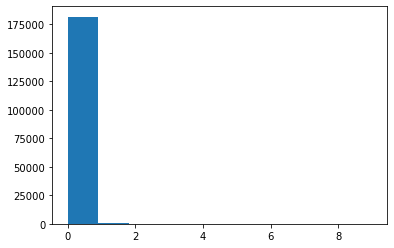

In [343]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.show()

In [344]:
#Filling the missing values with mean

application_data["AMT_REQ_CREDIT_BUREAU_DAY"]=application_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_DAY"].mean())

In [346]:
#Verification

application_data["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

0

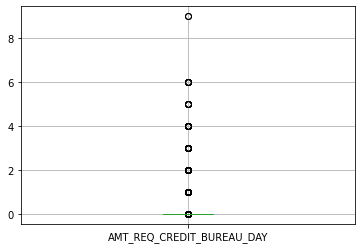

In [347]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_DAY")
plt.show()

In [348]:
# No outliers found

In [349]:
# Column AMT_REQ_CREDIT_BUREAU_WEEK(Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application))

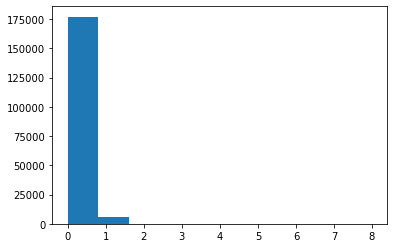

In [350]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_WEEK"])
plt.show()

In [351]:
# Filling the missing values with mean

application_data["AMT_REQ_CREDIT_BUREAU_WEEK"]=application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].mean())

In [353]:
#Verification

application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

0

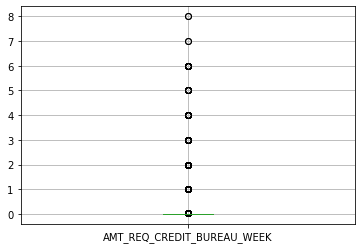

In [354]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_WEEK")
plt.show()

In [355]:
#No outliers found

In [356]:
# Column AMT_REQ_CREDIT_BUREAU_MON (Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application))

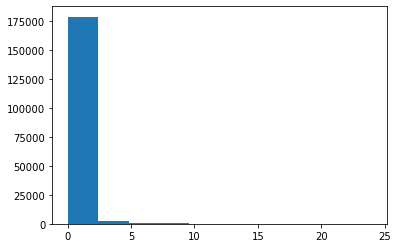

In [357]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_MON"])
plt.show()

In [358]:
# Filling missing values with mean

application_data["AMT_REQ_CREDIT_BUREAU_MON"]=application_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_MON"].mean())

In [360]:
# Verification

application_data["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

0

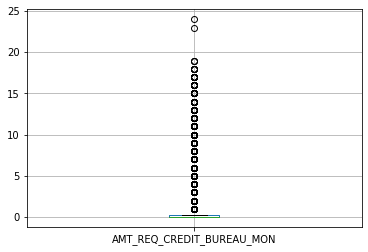

In [361]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_MON")
plt.show()

In [362]:
# No outliers found

In [363]:
# Column AMT_REQ_CREDIT_BUREAU_QRT(Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application))

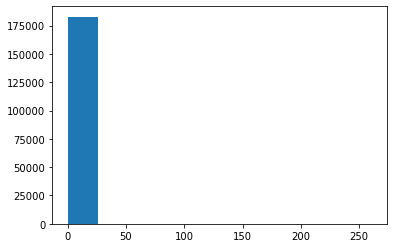

In [364]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_QRT"])
plt.show()

In [365]:
# Filling missing values with mean

application_data["AMT_REQ_CREDIT_BUREAU_QRT"]=application_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_QRT"].mean())

In [367]:
# Verification

application_data["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

0

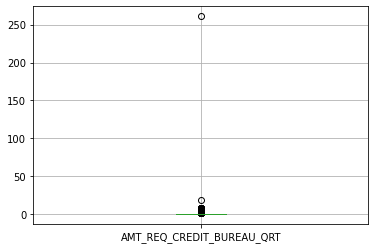

In [368]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_QRT")
plt.show()

In [369]:
# One outlier is found in the data

In [370]:
# Column AMT_REQ_CREDIT_BUREAU_YEAR(Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application))

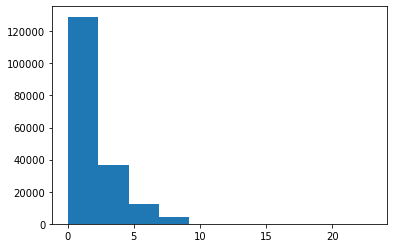

In [371]:
plt.hist(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

In [372]:
# Filling missing values with mean

application_data["AMT_REQ_CREDIT_BUREAU_YEAR"]=application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())

In [374]:
# Verification

application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

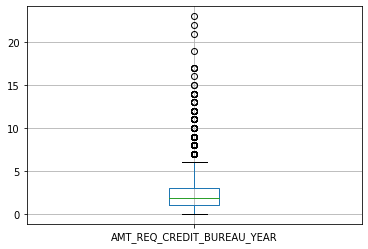

In [375]:
application_data.boxplot("AMT_REQ_CREDIT_BUREAU_YEAR")
plt.show()

In [376]:
# No outliers found

In [377]:
# Verifying the dataset

application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [381]:
# Converting the negative values into absolute values

application_data["DAYS_BIRTH"]=abs(application_data["DAYS_BIRTH"])
application_data["DAYS_ID_PUBLISH"]=abs(application_data["DAYS_ID_PUBLISH"])

In [380]:
# DATA CLEANING HAS BEEN COMPLETED

In [379]:
# MOVING TO THE DATA ANALYSIS

In [382]:
# Creating bins

In [383]:
# AMT_CREDIT

bins1=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slots1=["0-100000","100000-200000","200000-300000","300000-400000","400000-500000","500000-600000","600000-700000","700000-800000","800000-900000","900000 and above"]

In [384]:
# Adding the column

application_data["CREDIT_AMOUNT_RANGE"]=pd.cut(application_data["AMT_CREDIT"],bins=bins1,labels=slots1)

In [385]:
application_data["CREDIT_AMOUNT_RANGE"].head(10)

0        400000-500000
1     900000 and above
2        100000-200000
3        300000-400000
4        500000-600000
5        400000-500000
6     900000 and above
7     900000 and above
9        400000-500000
10       600000-700000
Name: CREDIT_AMOUNT_RANGE, dtype: category
Categories (10, object): ['0-100000' < '100000-200000' < '200000-300000' < '300000-400000' ... '600000-700000' < '700000-800000' < '800000-900000' < '900000 and above']

In [386]:
# AMT_INCOME_TOTAL

bins2=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,1000000000]
slots2=["0-50000","50000-100000","100000-150000","150000-200000","200000-250000","250000-300000","300000-350000","350000-400000","400000-450000","450000-500000","500000-550000","550000-600000","600000 and above"]

In [387]:
# Adding the column

application_data["INCOME_RANGE"]=pd.cut(application_data["AMT_INCOME_TOTAL"],bins=bins2,labels=slots2)

In [388]:
application_data["INCOME_RANGE"].head(10)

0     200000-250000
1     250000-300000
2      50000-100000
3     100000-150000
4     100000-150000
5      50000-100000
6     150000-200000
7     350000-400000
9     100000-150000
10    100000-150000
Name: INCOME_RANGE, dtype: category
Categories (13, object): ['0-50000' < '50000-100000' < '100000-150000' < '150000-200000' ... '450000-500000' < '500000-550000' < '550000-600000' < '600000 and above']

In [399]:
# Data set is divided into 2 segments : target1 (Clients with difficulty in payment),  target0(All other case)

target0=application_data[application_data["TARGET"]==0]
target1=application_data[application_data["TARGET"]==1]

In [409]:
# Merging both datasets application_data and previous_application

In [410]:
# Column SK_ID_CURR is common in both datasets

In [412]:
merged_data=pd.merge(application_data,previous_application,on="SK_ID_CURR",how="inner")

In [413]:
merged_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_AMOUNT_RANGE,INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,2120,0,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,400000-500000,200000-250000,1038818,Consumer loans,9251.775,179055.00,179055.0,179055.00,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,Missing,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900000 and above,250000-300000,1810518,Cash loans,98356.995,900000.00,1035882.0,900000.00,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900000 and above,250000-300000,2636178,Consumer loans,64567.665,337500.00,348637.5,337500.00,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,291,0,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900000 and above,250000-300000,2396755,Consumer loans,6737.310,68809.50,68053.5,68809.50,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,2531,0,Labore

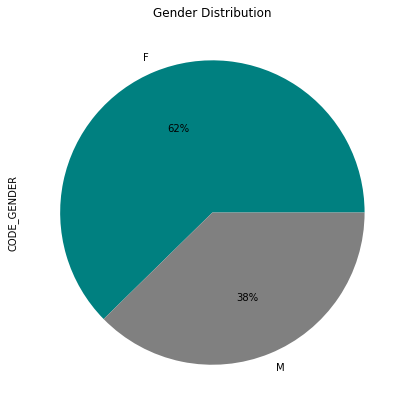

In [416]:
# Distribution of gender in the merged data

plt.figure(figsize=(7,7))
merged_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["teal","grey"])
plt.title("Gender Distribution")
plt.show()

In [417]:
# Interpretation

# In the merged dataset,62% of the clients are female and 38% are male.

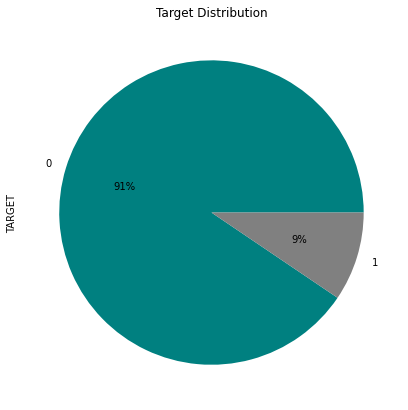

In [418]:
# Distribution of target in the merged data

plt.figure(figsize=(7,7))
merged_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["teal","grey"])
plt.title("Target Distribution")
plt.show()

In [419]:
# Interpretation

# In the merged dataset, 9% of the total clients have difficulty in payment

In [424]:
import warnings
warnings.filterwarnings("ignore")


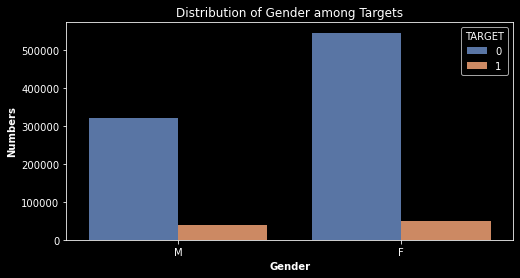

In [501]:
#Distribution of both Target among Gender

plt.figure(figsize=(8,4))
plt.title("Distribution of Gender among Targets")
sn.countplot("CODE_GENDER",hue='TARGET',data=merged_data,palette="deep")
plt.xlabel("Gender",weight="bold")
plt.ylabel("Numbers",weight="bold")
plt.show()

In [427]:
# Interpretation

# Major part of both male and female clients does not have difficulty in payments
# Clients with payment difficulties are equally distributed among both genders

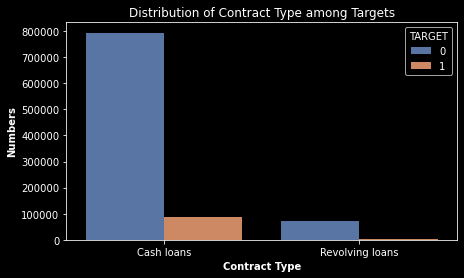

In [502]:
# Distribution of different contract types among targets

plt.figure(figsize=(7,4))
plt.title("Distribution of Contract Type among Targets")
sn.countplot("NAME_CONTRACT_TYPE_x",hue='TARGET',data=merged_data,palette="deep")
plt.xlabel("Contract Type",weight="bold")
plt.ylabel("Numbers",weight="bold")
plt.show()

In [438]:
# Interpretation

# Both target0 and target1 category clients are prefering cash loans than revolving loans

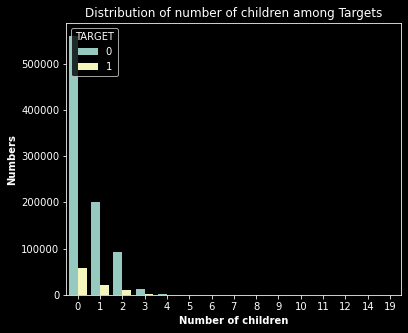

In [506]:
# Distribution of number of children among targets

plt.figure(figsize=(6,5))
plt.title("Distribution of number of children among Targets")
sn.countplot("CNT_CHILDREN",hue='TARGET',data=merged_data)
plt.xlabel("Number of children",weight="bold")
plt.ylabel("Numbers",weight="bold")
plt.show()

In [444]:
# Interpretation

# Majority of both target0 and target1 clients does not have children

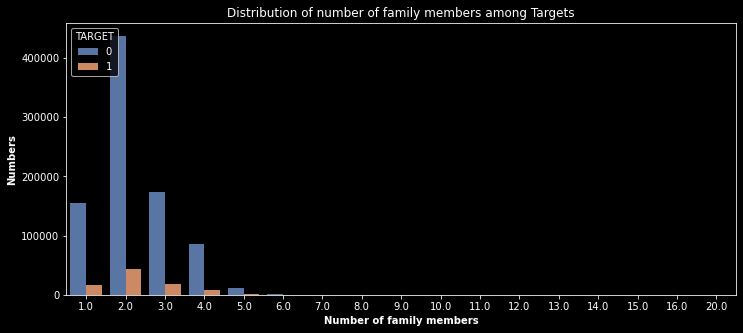

In [510]:
# Distribution of number of family members among targets

plt.figure(figsize=(12,5))
plt.title("Distribution of number of family members among Targets")
sn.countplot("CNT_FAM_MEMBERS",hue='TARGET',data=merged_data,palette="deep")
plt.xlabel("Number of family members",weight="bold")
plt.ylabel("Numbers",weight="bold")
plt.show()

In [446]:
# Interpratation

# In both targets, clients with 2 family members are more in numbers
# Clients with more than 4 family members doesnot have difficulty in payment

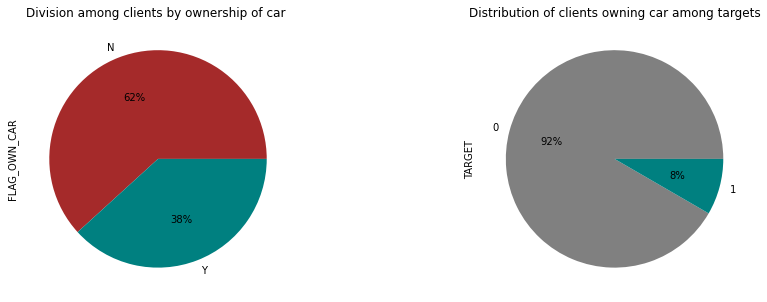

In [457]:
# Distribution of clients owning a car among targets

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Division among clients by ownership of car ")
merged_data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["brown","teal"])


plt.subplot(1,2,2)
plt.title("Distribution of clients owning car among targets")
merged_data[merged_data["FLAG_OWN_CAR"]=="Y"]["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["grey","teal"])
plt.show()

In [456]:
# Interpretation

# 62% of the clients doesnot own a car
# 38% of the clients own a car
# 92% of the clients owning a car does not have difficulty in payment and 8% have difficulty in payment

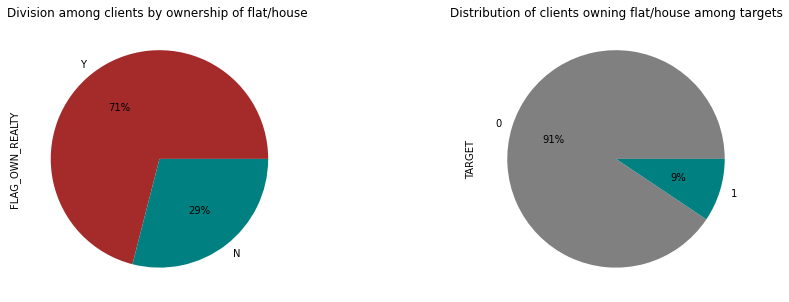

In [459]:
# Distribution of clients owning a flat or house among targets

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Division among clients by ownership of flat/house ")
merged_data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["brown","teal"])


plt.subplot(1,2,2)
plt.title("Distribution of clients owning flat/house among targets")
merged_data[merged_data["FLAG_OWN_REALTY"]=="Y"]["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["grey","teal"])
plt.show()


In [460]:
# Interpretation

# 71% of the clients own a flat/house and 29% do not.
# 91% of the clients owning a flat/house does not have difficulty in payment and 9% have difficulty in payment

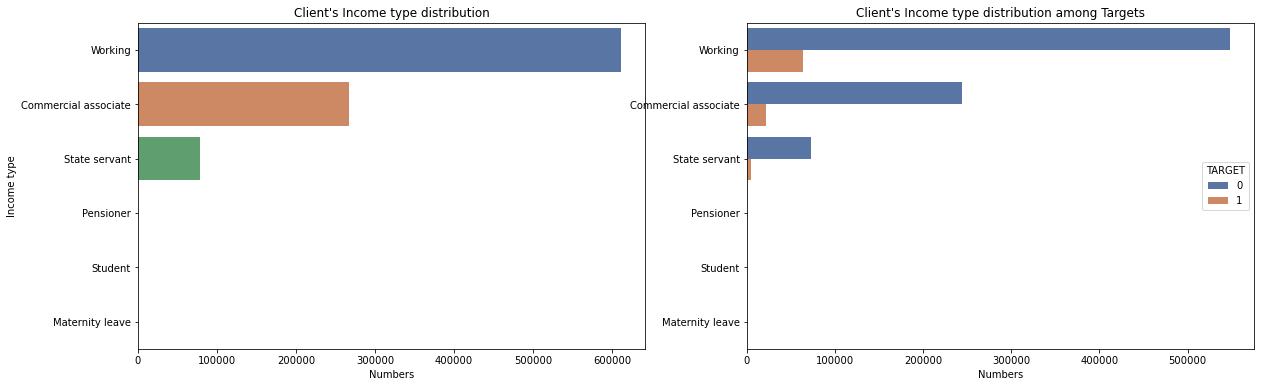

In [474]:
# Distribution of client's income type

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("Client's Income type distribution")
sn.countplot(y=merged_data["NAME_INCOME_TYPE"],palette="deep",order=merged_data["NAME_INCOME_TYPE"].value_counts().index)
plt.xlabel("Numbers")
plt.ylabel("Income type")


plt.subplot(1,2,2)
plt.title("Client's Income type distribution among Targets")
sn.countplot(y=merged_data["NAME_INCOME_TYPE"],hue=merged_data["TARGET"],palette="deep",order=merged_data["NAME_INCOME_TYPE"].value_counts().index)
plt.xlabel("Numbers")
plt.ylabel("")
plt.show()

In [480]:
# Interpretation

# Majority of the clients in both target types are working

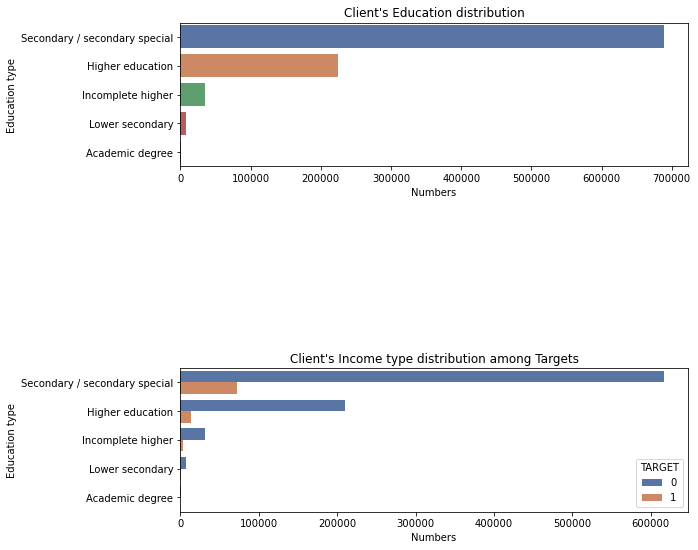

In [478]:
# Distribution of Education Level of Clients in both Target types

plt.figure(figsize=(20,9))
plt.subplot(3,2,1)
plt.title("Client's Education distribution")
sn.countplot(y=merged_data["NAME_EDUCATION_TYPE"],palette="deep",order=merged_data["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xlabel("Numbers")
plt.ylabel("Education type")


plt.subplot(3,2,5)
plt.title("Client's Income type distribution among Targets")
sn.countplot(y=merged_data["NAME_EDUCATION_TYPE"],hue=merged_data["TARGET"],palette="deep",order=merged_data["NAME_EDUCATION_TYPE"].value_counts().index)
plt.xlabel("Numbers")
plt.ylabel("Education type")
plt.show()


In [479]:
# Interpretation

# Majority of the client's education level fall under secondary/secondary special category
# Both defaulters and repayers are more in secondary/secondary special category
# There are no clients with academic degree
# All clients with lower secondary education are repayers

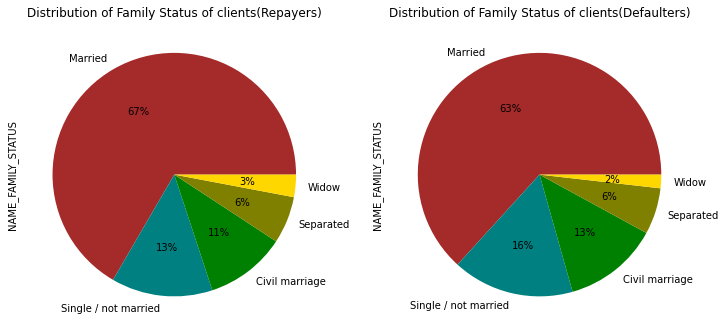

In [488]:
# Family Status of the clients

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Distribution of Family Status of clients(Repayers)")
merged_data[merged_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["brown","teal","green","olive","gold"])

plt.subplot(1,2,2)
plt.title("Distribution of Family Status of clients(Defaulters)")
merged_data[merged_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",colors=["brown","teal","green","olive","gold"])
plt.show()

In [489]:
# Interpretation

# Majority of the clients are married in both defaulters and repayers
# Every category of client's family status is almost equally distributed between defaulters and repayers

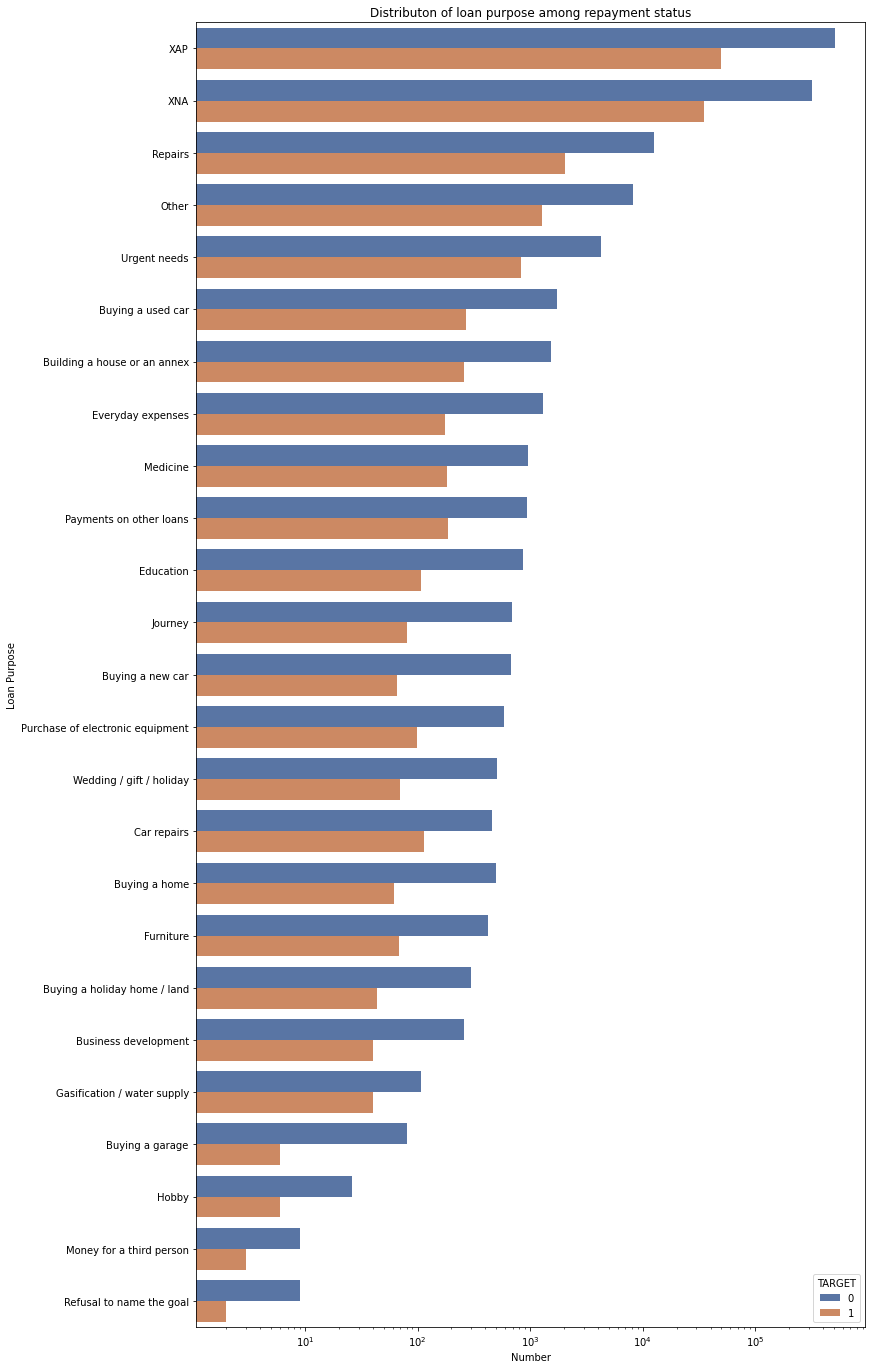

In [491]:
# Distribution of purpose of loan

plt.figure(figsize=(12,24))
plt.xscale("log")
plt.title("Distributon of loan purpose among repayment status")

sn.countplot(data=merged_data, y="NAME_CASH_LOAN_PURPOSE", order=merged_data["NAME_CASH_LOAN_PURPOSE"].value_counts().index,hue='TARGET',palette="deep")
plt.xlabel("Number")
plt.ylabel("Loan Purpose")
plt.show()

In [492]:
# Interpretation

# The count of repayers are more than defaulters in the list of clients who refuse to name the goal
# Majority of both repayers and defaulters are applying for loan for repair purpose


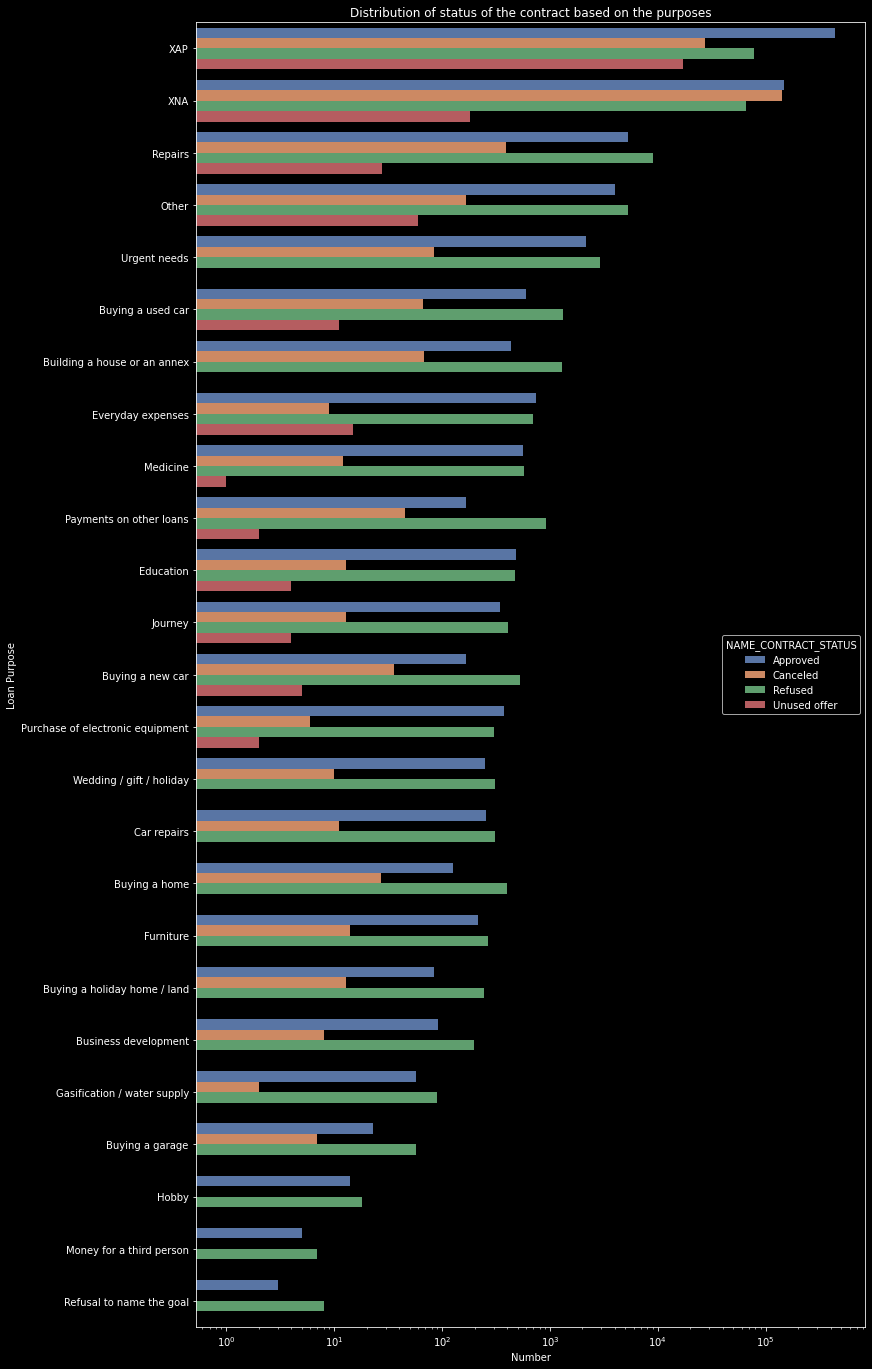

In [497]:
# Distribution of status of the contract based on the purposes
plt.figure(figsize=(12,24))
plt.xscale("log")
plt.title("Distribution of status of the contract based on the purposes")

sn.countplot(data=merged_data, y="NAME_CASH_LOAN_PURPOSE", order=merged_data["NAME_CASH_LOAN_PURPOSE"].value_counts().index,hue='NAME_CONTRACT_STATUS',palette="deep")
plt.xlabel("Number")
plt.ylabel("Loan Purpose")
plt.show()



In [511]:
# Interpretation

# Most number of approvals and most number of rejections of loan are for repair purpose
# Most of the loans applied for payment of other loans are rejected
# There are equal number of approvals and rejections for education purpose